## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
data.shape

(100, 8)

In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=16)

In [36]:
X_train,Y_train

(array([[ 4.54202458e-02, -1.46744180e+00,  5.81716801e-01,
         -1.24864784e-02, -1.46744180e+00,  5.89939855e-02,
          1.38043580e-01],
        [-5.81065904e-01,  6.31902691e-01, -9.43643106e-01,
         -6.04024675e-01,  6.31902691e-01, -6.57555878e-01,
         -1.89048402e+00],
        [-1.05093052e+00,  6.31902691e-01, -8.74308565e-01,
         -1.01838044e+00,  6.31902691e-01, -1.02210899e+00,
         -1.67303624e+00],
        [-1.11201292e-01,  1.26170604e+00, -9.43643106e-01,
         -1.64556439e-01,  1.26170604e+00, -2.62030398e-01,
         -3.63631706e-01],
        [ 1.92487869e+00,  2.09934449e-03,  1.27506221e+00,
          2.02999446e+00,  2.09934449e-03,  1.98095483e+00,
         -9.90981942e-02],
        [-1.05093052e+00, -2.07835104e-01, -1.01297765e+00,
         -1.01838044e+00, -2.07835104e-01, -1.03885081e+00,
         -1.43304574e+00],
        [-7.37687441e-01,  2.12033793e-01, -1.15164673e+00,
         -7.44933538e-01,  2.12033793e-01, -8.09487887e-01

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task: 1 Logistic Regression

### 1. Finding the Correlation between the features

In [7]:
# a. check the correlation between the features

data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


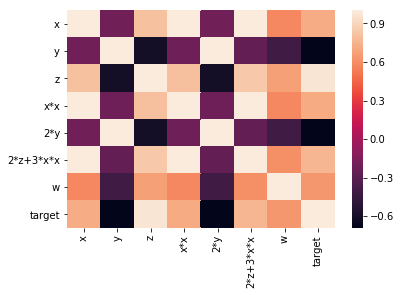

In [8]:
# b. plot heat map of correlation matrix using seaborn heatmap

sns.heatmap(data.corr())

### 2. Finding the best model for the given data

In [9]:
# a. Train Logistic regression on data(X,Y) that we have created in the above cell

cfg = SGDClassifier(loss='log')
cfg.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation 

tuned_para = [{'alpha':[10**-4,10**-2,10**0,10**2,10**4]}]
model = GridSearchCV(SGDClassifier(loss='log',random_state = 1),tuned_para)
model.fit(X_train,Y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [11]:
# c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

best_model = SGDClassifier(loss='log',alpha=0.01)

### 3. Getting the weights with the original data

In [12]:
# a. train the 'best_model' with X, Y

best_model.fit(X_train,Y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
# b. Check the accuracy of the model 'best_model_accuracy'

best_model_accuracy = best_model.score(X_test,Y_test)
print(best_model_accuracy)

1.0


In [14]:
# c. Get the weights W using best_model.coef_
W = best_model.coef_
print(W)

[[ 0.71392077 -0.84989874  1.83835164  0.63333854 -0.84989874  0.79195873
   0.47601577]]


### 4. Modifying original data

In [15]:
# a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

X_train_new = X_train+0.01

In [16]:
# b. Train the same 'best_model' with data (X', Y)
best_model.fit(X_train_new,Y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# c. Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model.score(X_test,Y_test)
print(best_model_accuracy_edited)

1.0


In [18]:
# d. Get the weights W' using best_model.coef_
W_error = best_model.coef_
print(W_error)

[[ 0.75015978 -0.88687805  1.70383348  0.69805751 -0.88687805  0.83399534
   0.47021967]]


## 5.  Checking deviations in metric and weights 

In [19]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
print(best_model_accuracy - best_model_accuracy_edited)

0.0


In [20]:
# b. find the absolute change between each value of W and W' ==> |(W-W')|
W_change = abs(W-W_error)
print(W_change)

[[0.03623901 0.03697931 0.13451815 0.06471897 0.03697931 0.0420366
  0.0057961 ]]


In [21]:
# c. print the top 4 features which have higher % change in weights compare to the other feature
feat = list(data.columns) 
percent_values = list((W_change*100/abs(W))[0])
values = sorted(zip(feat,percent_values),key = lambda x: x[1],reverse = True)
# print(values)
i = 0
print('Top 4 features which have higher % change in weights compare to the other feature')
for x,y in enumerate(values):
    if i<4:
        print(y)
    i+=1

Top 4 features which have higher % change in weights compare to the other feature
('x*x', 10.21870045461081)
('z', 7.317324378945202)
('2*z+3*x*x', 5.307928468448101)
('x', 5.076054953800743)


## Task: 2 Linear SVM

### 2. Finding the best model for the given data

In [22]:
# a. Train Logistic regression on data(X,Y) that we have created in the above cell

cfg = SGDClassifier(loss='hinge')
cfg.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
# b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation 

tuned_para = [{'alpha':[10**-4,10**-2,10**0,10**2,10**4]}]
model = GridSearchCV(SGDClassifier(loss='hinge',random_state = 1),tuned_para)
model.fit(X_train,Y_train)
print(model.best_estimator_)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [24]:
# c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

best_model = SGDClassifier(loss='hinge',alpha=0.01,random_state = 1)

### 3. Getting the weights with the original data

In [25]:
# a. train the 'best_model' with X, Y

best_model.fit(X_train,Y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
# b. Check the accuracy of the model 'best_model_accuracy'

best_model_accuracy = best_model.score(X_test,Y_test)
print(best_model_accuracy)

1.0


In [27]:
# c. Get the weights W using best_model.coef_
W = best_model.coef_
print(W)

[[ 0.45215365 -0.51807836  1.48045548  0.42888775 -0.51807836  0.56474155
   0.32196128]]


### 4. Modifying original data

In [28]:
# a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

X_train_new = X_train+0.01

In [29]:
# b. Train the same 'best_model' with data (X', Y)
best_model.fit(X_train_new,Y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# c. Check the accuracy of the model 'best_model_accuracy_edited'
best_model_accuracy_edited = best_model.score(X_test,Y_test)
print(best_model_accuracy_edited)

1.0


In [31]:
# d. Get the weights W' using best_model.coef_
W_error = best_model.coef_
print(W_error)

[[ 0.73126318 -0.78528992  1.97252728  0.69455317 -0.78528992  0.86340519
   0.24176932]]


## 5.  Checking deviations in metric and weights 

In [32]:
# a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
print(best_model_accuracy - best_model_accuracy_edited)

0.0


In [33]:
# b. find the absolute change between each value of W and W' ==> |(W-W')|
W_change = abs(W-W_error)
print(W_change)

[[0.27910953 0.26721156 0.4920718  0.26566542 0.26721156 0.29866364
  0.08019196]]


In [34]:
# c. print the top 4 features which have higher % change in weights compare to the other feature
feat = list(data.columns) 
percent_values = list((W_change*100/abs(W))[0])
values = sorted(zip(feat,percent_values),key = lambda x: x[1],reverse = True)
print(values)
i = 0
print('Top 4 features which have higher % change in weights compare to the other feature')
for x,y in enumerate(values):
    if i<4:
        print(y)
    i+=1

[('x*x', 61.94287977806593), ('x', 61.72891086334997), ('2*z+3*x*x', 52.885012958777835), ('y', 51.57744005458996), ('2*y', 51.57744005458996), ('z', 33.23786540840495), ('w', 24.90733150080833)]
Top 4 features which have higher % change in weights compare to the other feature
('x*x', 61.94287977806593)
('x', 61.72891086334997)
('2*z+3*x*x', 52.885012958777835)
('y', 51.57744005458996)
